# Projet 2 : Concevez une application au service de la santé publique
# Analyse

## 1. Importation des données

In [1]:
#importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importation du datset nettoyé
df = pd.read_csv("data3_for_analysis.csv", index_col = 0)
# index_col = 0 => col 0 to use as the row labels of the DataFrame
df

code                      product_name                 brands  \
0            472821     pressed pink lady apple juice        marks & spencer   
1           5017231                      jus de pomme               solevita   
2      569831001070  jus de pomme pur jus de provence                unknown   
3     1307504440004         pur jus pomme de provence                unknown   
4          15673367        pur jus artisanal de pomme                unknown   
...             ...                               ...                    ...   
8339  3760267350023           yaourt fermier myrtille   la ferme marty-debat   
8340  3770000451115   yaourt fermier myrtille sauvage    les p’tits fermiers   
8341  3770000451764     yaourts à la myrtille sauvage  invitation a la ferme   
8342  3770011182060            yaourt brassé myrtille                unknown   
8343  8005350021240            yaourt au fruits mixés        yomo, granarolo   

                 main_category  energy-kcal_100g  proteins_100g  \
0     en:squeezed-apple-juices              51.0           0.40   
1     en:squeezed-apple-juices              47.0           0.10   
2     en:squeezed-apple-juices              44.0           0.17   
3     en:squeezed-apple-juices              48.0           0.50   
4     en:squeezed-apple-juices              52.0           0.50   
...                        ...               ...            ...   
8339      en:blueberry-yogurts             113.0           3.70   
8340      en:blueberry-yogurts              99.0           3.30   
8341      en:blueberry-yogurts              97.0           3.40   
8342      en:blueberry-yogurts              91.0           3.20   
8343      en:blueberry-yogurts             101.0           3.50   

      carbohydrates_100g  sugars_100g  fat_100g  saturated-fat_100g  \
0                   11.7         10.8      0.20               0.100   
1                   11.0         10.5      0.10               0.100   
2                   10.0          9.6      0.14               0.046   
3                   12.0         11.0      0.50               0.100   
4                   13.0         11.5      0.50               0.100   
...                  ...          ...       ...                 ...   
8339                18.0         15.3      2.70               1.500   
8340                12.5         12.0      3.60               2.300   
8341                11.8         11.3      3.60               2.300   
8342                12.0         11.8      3.40               2.000   
8343                13.0         12.0      3.50               2.400   

      sodium_100g  additives_n  ingredients_from_palm_oil_n  \
0          0.0120          0.0                          0.0   
1          0.0040          0.0                          0.0   
2          0.0052          0.0                          0.0   
3          0.0080          0.0                          0.0   
4          0.0040          0.0                          0.0   
...           ...          ...                          ...   
8339       0.0400          1.0                          0.0   
8340       0.0440          1.0                          0.0   
8341       0.0468          1.0                          0.0   
8342       0.0400          1.0                          0.0   
8343       0.0440          1.0                          0.0   

      nutrition-score-fr_100g   type_gouter Nutri_label  
0                         6.0  fruit_juices           D  
1                         4.0  fruit_juices           C  
2                         4.0  fruit_juices           C  
3                         5.0  fruit_juices           C  
4                         6.0  fruit_juices           D  
...                       ...           ...         ...  
8339                      3.0       yogurts           C  
8340                      3.0       yogurts           C  
8341                      3.0       yogurts           C  
8342                      3.0       yogurts           C  
8

Vérification des valeurs manquantes

In [4]:
# fonction qui prend comme paramètre un dataFrame df 
# et qui returne le % de valeurs manquantes
def per_missing(df) :
    
    return df.isnull().sum() *100 /len(df)

In [5]:
per_missing(df)

code                           0.0
product_name                   0.0
brands                         0.0
main_category                  0.0
energy-kcal_100g               0.0
proteins_100g                  0.0
carbohydrates_100g             0.0
sugars_100g                    0.0
fat_100g                       0.0
saturated-fat_100g             0.0
sodium_100g                    0.0
additives_n                    0.0
ingredients_from_palm_oil_n    0.0
nutrition-score-fr_100g        0.0
type_gouter                    0.0
Nutri_label                    0.0
dtype: float64

In [6]:
#Informations sur type de colonnes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8344 entries, 0 to 8343
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   code                         8344 non-null   int64  
 1   product_name                 8344 non-null   object 
 2   brands                       8344 non-null   object 
 3   main_category                8344 non-null   object 
 4   energy-kcal_100g             8344 non-null   float64
 5   proteins_100g                8344 non-null   float64
 6   carbohydrates_100g           8344 non-null   float64
 7   sugars_100g                  8344 non-null   float64
 8   fat_100g                     8344 non-null   float64
 9   saturated-fat_100g           8344 non-null   float64
 10  sodium_100g                  8344 non-null   float64
 11  additives_n                  8344 non-null   float64
 12  ingredients_from_palm_oil_n  8344 non-null   float64
 13  nutrition-score-fr

La colonne "code" est devenue integer, on va la changer en object pour pas être gêné dans la suite de l'analyse.

In [7]:
df["code"] = df["code"].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8344 entries, 0 to 8343
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   code                         8344 non-null   object 
 1   product_name                 8344 non-null   object 
 2   brands                       8344 non-null   object 
 3   main_category                8344 non-null   object 
 4   energy-kcal_100g             8344 non-null   float64
 5   proteins_100g                8344 non-null   float64
 6   carbohydrates_100g           8344 non-null   float64
 7   sugars_100g                  8344 non-null   float64
 8   fat_100g                     8344 non-null   float64
 9   saturated-fat_100g           8344 non-null   float64
 10  sodium_100g                  8344 non-null   float64
 11  additives_n                  8344 non-null   float64
 12  ingredients_from_palm_oil_n  8344 non-null   float64
 13  nutrition-score-fr

In [8]:
# Fonction qui retourne un sous-dataset à partir d'un data set df_in, selon une valeur val 
# de la colonne col_tri
def df_filt(df_in,col_tri, val) :
    df_out = df_in.loc[df_in[col_tri]== val]
    
    return df_out.reset_index(drop=True)

Récupération des sous-datasets par type_gouter :

In [9]:
dfY = df_filt(df,"type_gouter", "yogurts")
dfB = df_filt(df,"type_gouter", "biscuits")
dfJ = df_filt(df,"type_gouter", "fruit_juices")

## 2. Analyse univariée

### 2.1 Type gouter

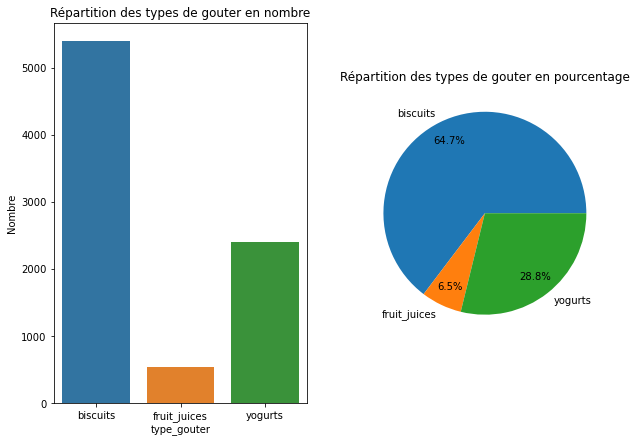

In [10]:
#Visualisation sur un même schéma d'un diagramme en barres et d'une pie-chart pour la répartition de type_gouter
f,ax = plt.subplots(figsize = (10,7))

plt.subplot(121) #localisation
sns.countplot(x = "type_gouter", data = df.sort_values(by="type_gouter"))
plt.title("Répartition des types de gouter en nombre")
plt.ylabel("Nombre")
plt.xlabel("type_gouter")

plt.subplot(122) #localisation
df_gouter = df.groupby('type_gouter', axis = 0)["product_name"].count() #on regroupe par type_gouter
labels = df_gouter.keys() #récupération des labels dans les clés du dataframe df_gouper
plt.pie(x= df_gouter, autopct="%.1f%%", labels = labels, pctdistance=0.8)
plt.title("Répartition des types de gouter en pourcentage")
plt.show()

Quasiment 2/3 des type_gouter sont des biscuits => intérêt de distinguer selon le type_gouter

### 2.2 Main_category

Au sein des différents type_gouter, on va regarder comment se répartissent les main_category.

#### a. Chez les biscuits

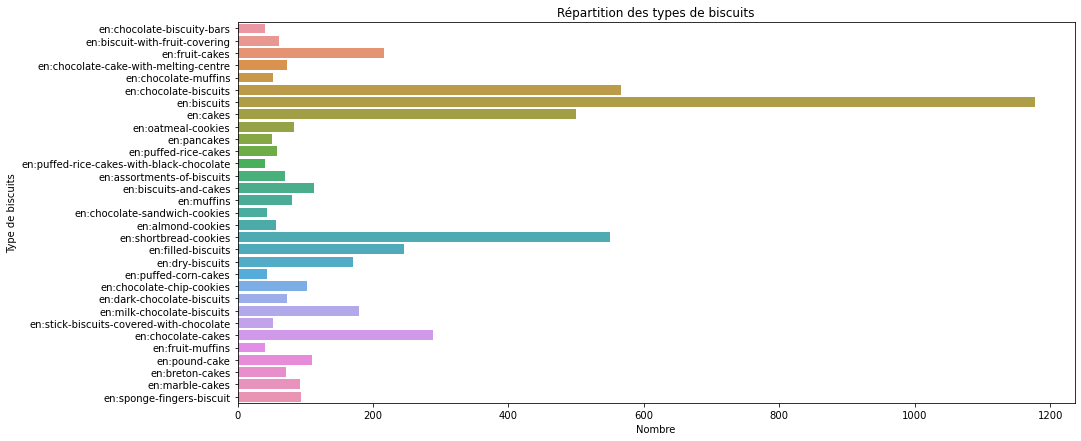

In [21]:
f,ax = plt.subplots(figsize = (15,7))
sns.countplot(y = "main_category", data = dfB)
plt.title("Répartition des types de biscuits")
plt.xlabel("Nombre")
plt.ylabel("Type de biscuits")
plt.show()

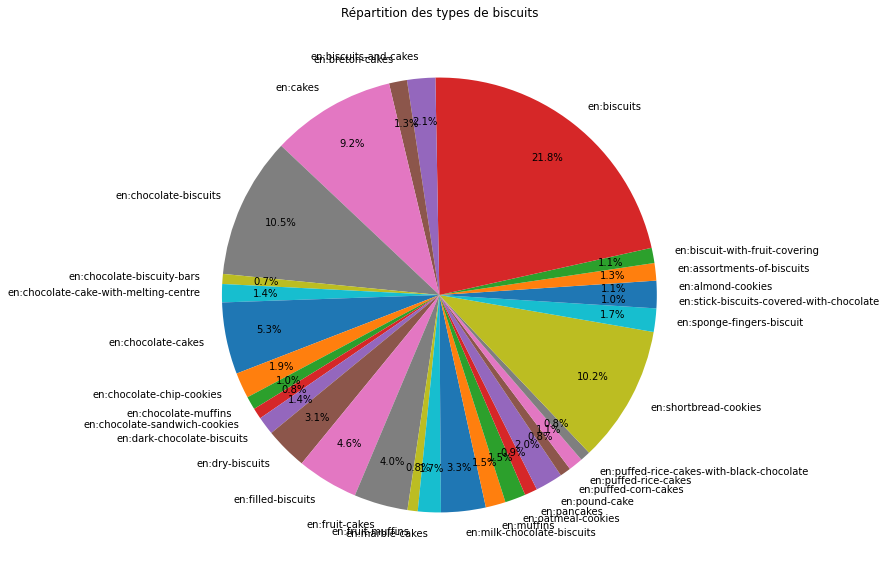

In [22]:
#pie chart en regroupant par main_category
f,ax = plt.subplots(figsize = (10,10))

df_b = dfB.groupby('main_category', axis = 0)["product_name"].count()
labels = df_b.keys()
plt.pie(x= df_b, autopct="%.1f%%", labels = labels, pctdistance=0.8)
plt.title("Répartition des types de biscuits")
plt.show()

Catégories « génériques » majoritaires comme en:biscuits ou en:chocolate-biscuits.

#### b. Chez les yogurts

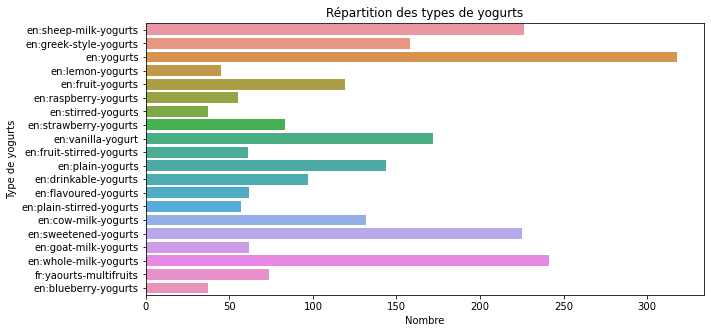

In [23]:
f,ax = plt.subplots(figsize = (10,5))
sns.countplot(y = "main_category", data = dfY)
plt.title("Répartition des types de yogurts")
plt.xlabel("Nombre")
plt.ylabel("Type de yogurts")
plt.show()

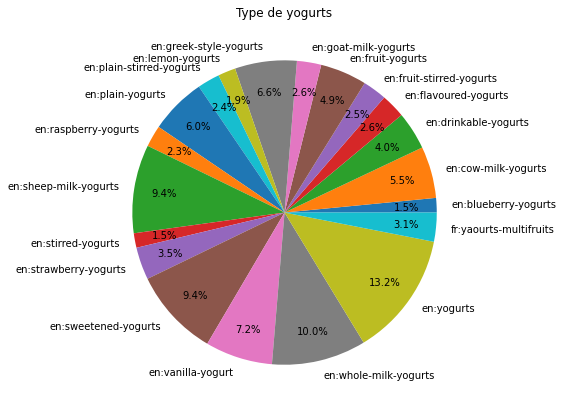

In [24]:
df_yogurts = dfY.groupby('main_category',axis=0)["product_name"].count()
f,ax = plt.subplots(figsize = (7,7))
labels = df_yogurts.keys()
plt.pie(x= df_yogurts, autopct="%.1f%%", labels = labels,pctdistance=0.8)
plt.title("Type de yogurts")
plt.show()

Répartition plus homogène que pour les biscuits.

#### c. Chez les fruit_juices

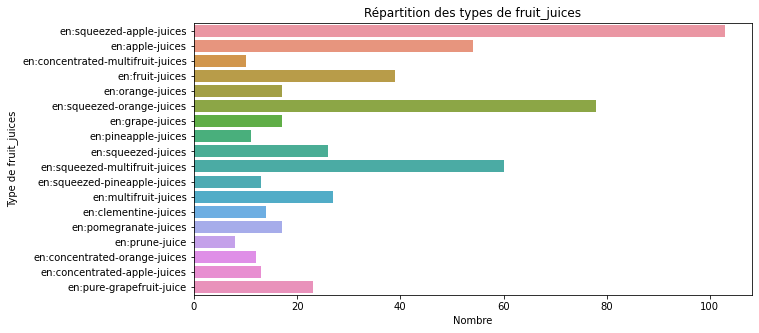

In [25]:
f,ax = plt.subplots(figsize = (10,5))
sns.countplot(y = "main_category", data = dfJ)
plt.title("Répartition des types de fruit_juices")
plt.xlabel("Nombre")
plt.ylabel("Type de fruit_juices")
plt.show()

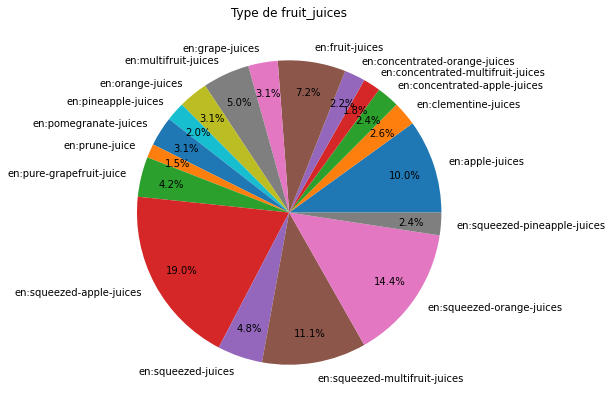

In [26]:
df_J = dfJ.groupby('main_category',axis=0)["product_name"].count()
f,ax = plt.subplots(figsize = (7,7))
labels = df_J.keys()
plt.pie(x= df_J, autopct="%.1f%%", labels = labels,pctdistance=0.8)
plt.title("Type de fruit_juices")
plt.show()

Une seule catégorie générique, non majoritaire.

### 2.3 type_gouter selon Nutri_label

On va regarder la distribution des type_gouter selon le Nutri_label.

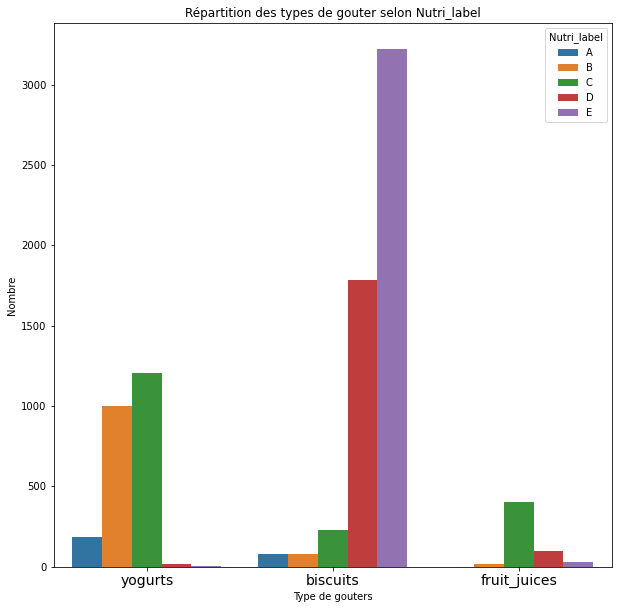

In [30]:
#type de gouter selon Nutri_label
f,ax = plt.subplots(figsize = (10,10))
plt.xticks(fontsize=14)
sns.countplot(x = "type_gouter", data = df.sort_values(by = "Nutri_label"), hue="Nutri_label")
#tri par Nutri_label pour avoir le même ordre
plt.title("Répartition des types de gouter selon Nutri_label")
plt.xlabel("Type de gouters")
plt.ylabel("Nombre")
plt.show()

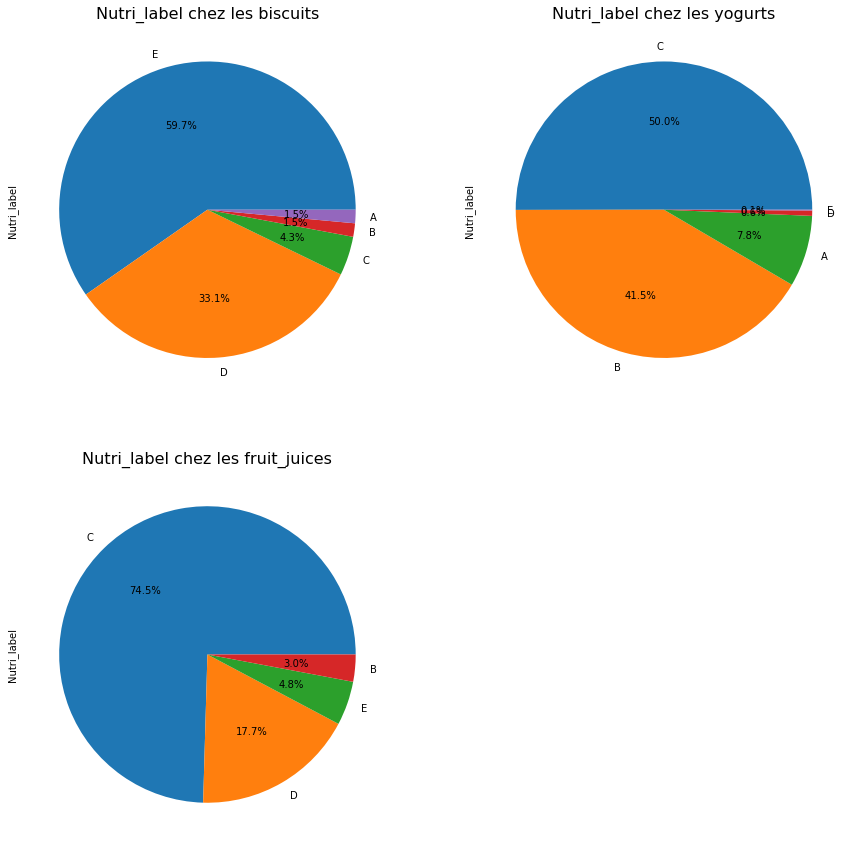

In [33]:
#Répartition en pie chart du nutri_label selon le type_gouter
f,ax = plt.subplots(figsize = (15,15))
plt.subplot(221)
dfB.Nutri_label.value_counts().plot(kind='pie',autopct="%.1f%%" )
plt.title("Nutri_label chez les biscuits", fontsize=16)

plt.subplot(222)
dfY.Nutri_label.value_counts().plot(kind='pie',autopct="%.1f%%" )
plt.title("Nutri_label chez les yogurts",fontsize=16)

plt.subplot(223)
dfJ.Nutri_label.value_counts().plot(kind='pie',autopct="%.1f%%" )
plt.title("Nutri_label chez les fruit_juices",fontsize=16)

plt.show()

On voit que les biscuits sont très majoritairement de catégories D ou E. Il sera donc aisé de proposer un yogurt ou fruit_juice de meilleur Nutri_label.

Les yogurts sont plutôt B et C.

Les fruit-juices plutôt C.

### 2.4 main_category selon Nutri_label

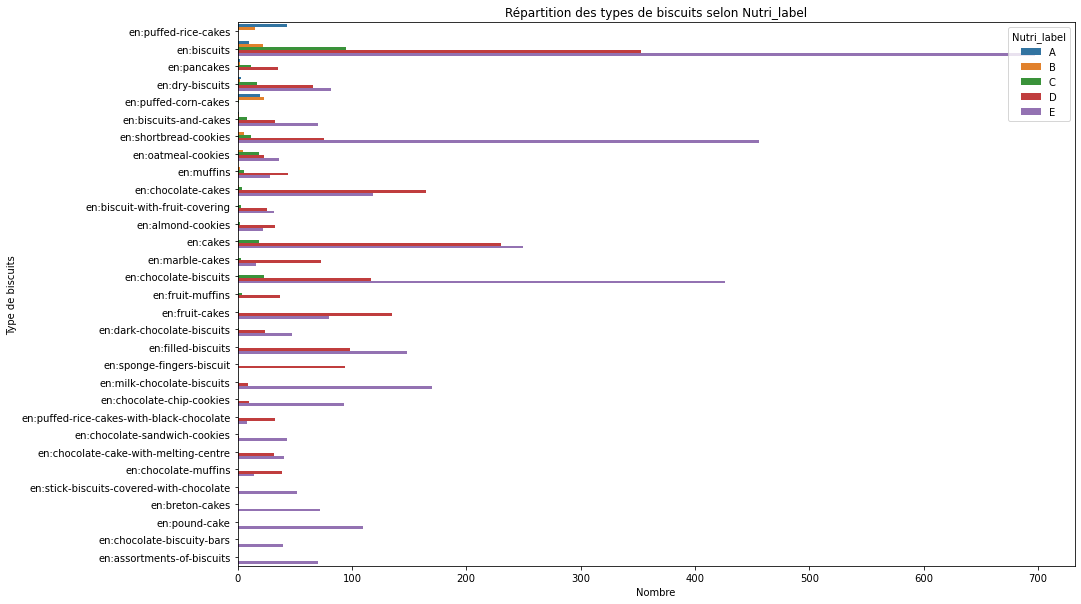

In [34]:
#Chez les biscuits
f,ax = plt.subplots(figsize = (15,10))
sns.countplot(y = "main_category", data = dfB.sort_values(by = "Nutri_label"), hue="Nutri_label")
plt.title("Répartition des types de biscuits selon Nutri_label")
plt.xlabel("Nombre")
plt.ylabel("Type de biscuits")
plt.show()

Certaines main_category n’ont qu’un type de Nutri_label, donc la proposition d'un produit équivalent avec un meilleur nutriscore va se faire en jouant sur le nombre d'additifs.

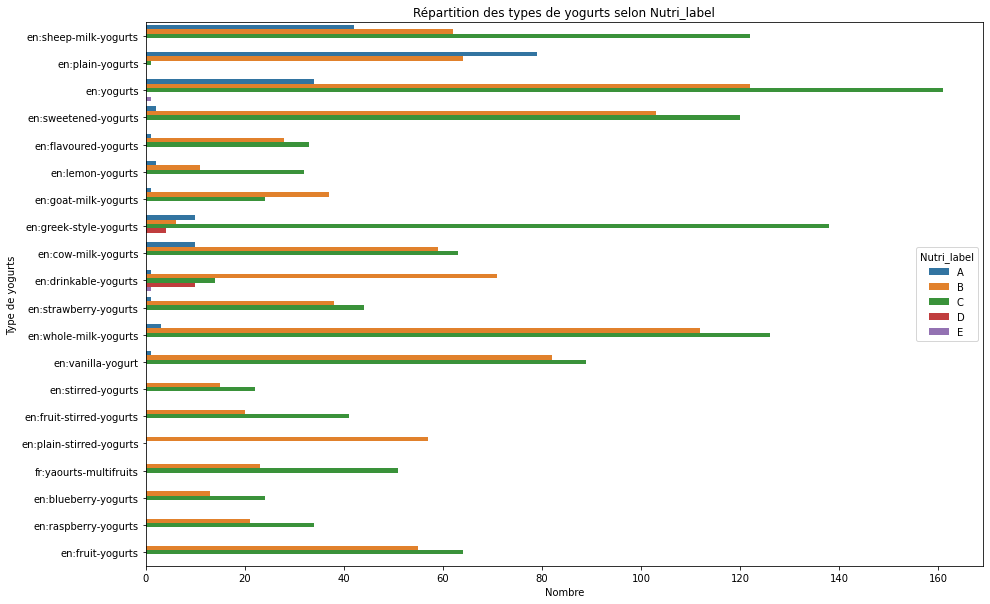

In [35]:
#Chez les yogurts
f,ax = plt.subplots(figsize = (15,10))
sns.countplot(y = "main_category", data = dfY.sort_values(by = "Nutri_label"), hue="Nutri_label")
plt.title("Répartition des types de yogurts selon Nutri_label")
plt.xlabel("Nombre")
plt.ylabel("Type de yogurts")
plt.show()

Plusieurs main_category avec seulement 2 Nutri_label

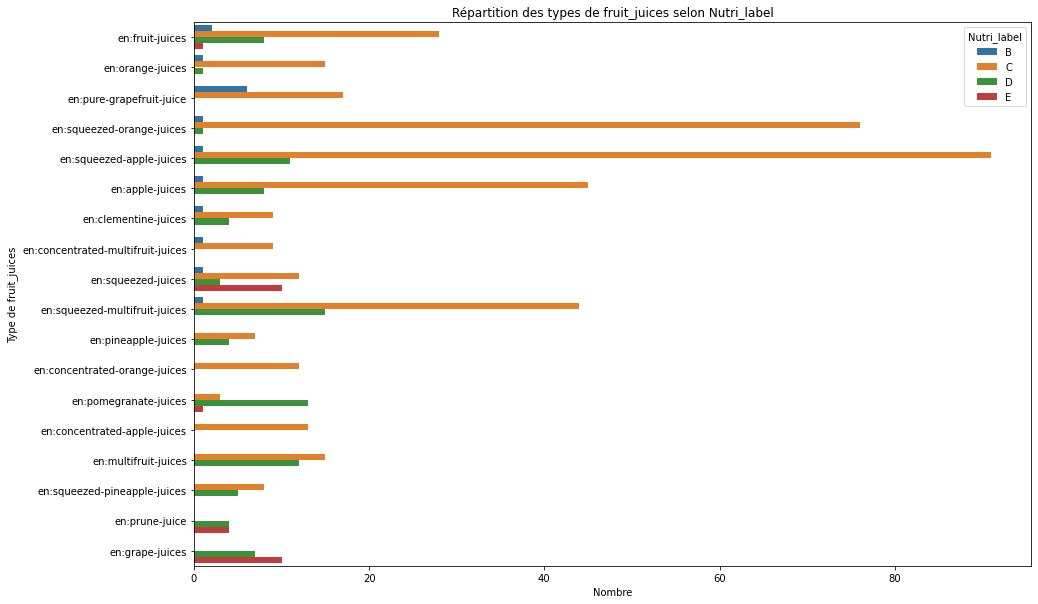

In [36]:
#Chez les fruit_juices
f,ax = plt.subplots(figsize = (15,10))
sns.countplot(y = "main_category", data = dfJ.sort_values(by = "Nutri_label"), hue="Nutri_label")
plt.title("Répartition des types de fruit_juices selon Nutri_label")
plt.xlabel("Nombre")
plt.ylabel("Type de fruit_juices")
plt.show()

### 2.5 Additives_n

On va regarder la distribution des additives_n selon le type de gouter.

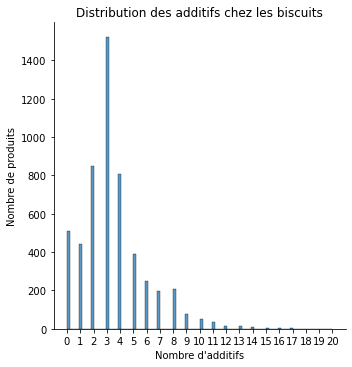

In [42]:
#chez les biscuits
g = sns.displot(x = "additives_n", data = dfB)
plt.title("Distribution des additifs chez les biscuits")
g.set(xticks = range(0,21,1))
plt.ylabel("Nombre de produits")
plt.xlabel("Nombre d'additifs")
plt.show()

Distribution en cloche, avec un mode à 3.

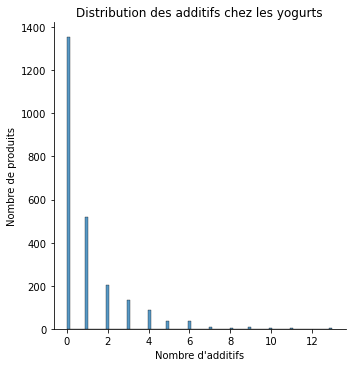

In [43]:
#chez les yogurts
sns.displot(x = "additives_n", data = dfY)
plt.title("Distribution des additifs chez les yogurts")
plt.ylabel("Nombre de produits")
plt.xlabel("Nombre d'additifs")
plt.show()

Distribution décroissante, avec le mode à 0

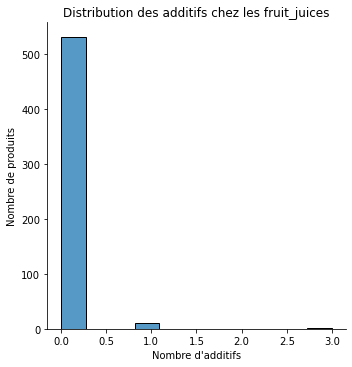

In [44]:
#chez les fruit_juices
sns.displot(x = "additives_n", data = dfJ)
plt.title("Distribution des additifs chez les fruit_juices")
plt.ylabel("Nombre de produits")
plt.xlabel("Nombre d'additifs")
plt.show()

Quasiment pas d'additifs chez les fruit_juices, donc un meilleur produit va se jouer sur la valeur du Nutri_label.

### 2.6 ingredients_from_palm_oil_n

On va regarder la distribution des ingredients_from_palm_oil_n chez les biscuits.

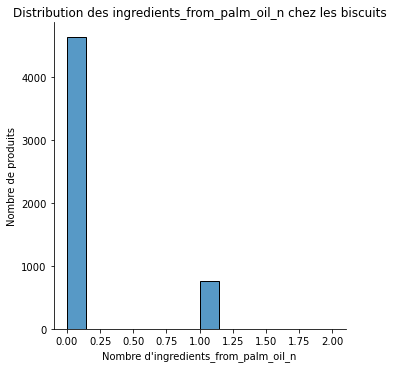

In [252]:
sns.displot(x = "ingredients_from_palm_oil_n", data = dfB)
plt.title("Distribution des ingredients_from_palm_oil_n chez les biscuits")
plt.ylabel("Nombre de produits")
plt.xlabel("Nombre d'ingredients_from_palm_oil_n")
plt.show()

In [45]:
dfB['ingredients_from_palm_oil_n'].value_counts()

0.0    4637
1.0     756
2.0       4
Name: ingredients_from_palm_oil_n, dtype: int64

Cette colonne pourra être utile au cas par cas selon le type de biscuits.

### 2.7 nutrition-score-fr_100g

On va regarder la distribution du nutriscore "numérique" selon le type de gouter.

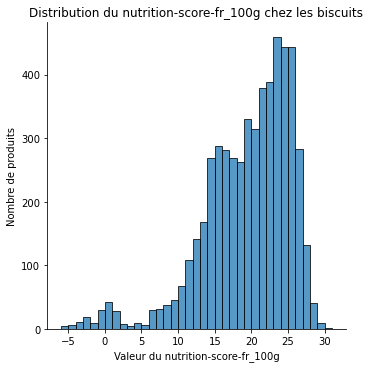

In [46]:
sns.displot(x = "nutrition-score-fr_100g", data = dfB)
plt.title("Distribution du nutrition-score-fr_100g chez les biscuits")
plt.ylabel("Nombre de produits")
plt.xlabel("Valeur du nutrition-score-fr_100g")
plt.show()

Distribution non symétrique qui laisse apparaitre plusieurs modes.

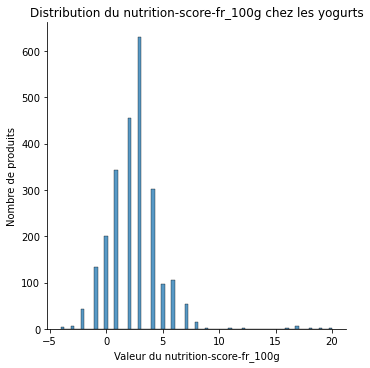

In [47]:
sns.displot(x = "nutrition-score-fr_100g", data = dfY)
plt.title("Distribution du nutrition-score-fr_100g chez les yogurts")
plt.ylabel("Nombre de produits")
plt.xlabel("Valeur du nutrition-score-fr_100g")
plt.show()

Distribution plus symétrique et qui semble unimodale

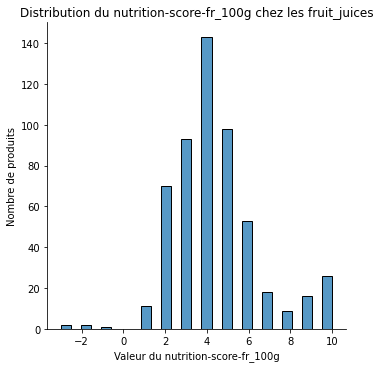

In [49]:
sns.displot(x = "nutrition-score-fr_100g", data = dfJ)
plt.title("Distribution du nutrition-score-fr_100g chez les fruit_juices")
plt.ylabel("Nombre de produits")
plt.xlabel("Valeur du nutrition-score-fr_100g")
plt.show()

Distribution qui laisse apparaître un second mode sur la fin

## 3. Analyse bivariée

### 3.1 Box-plot Nutri_label et colonne numérique selon type_gouter

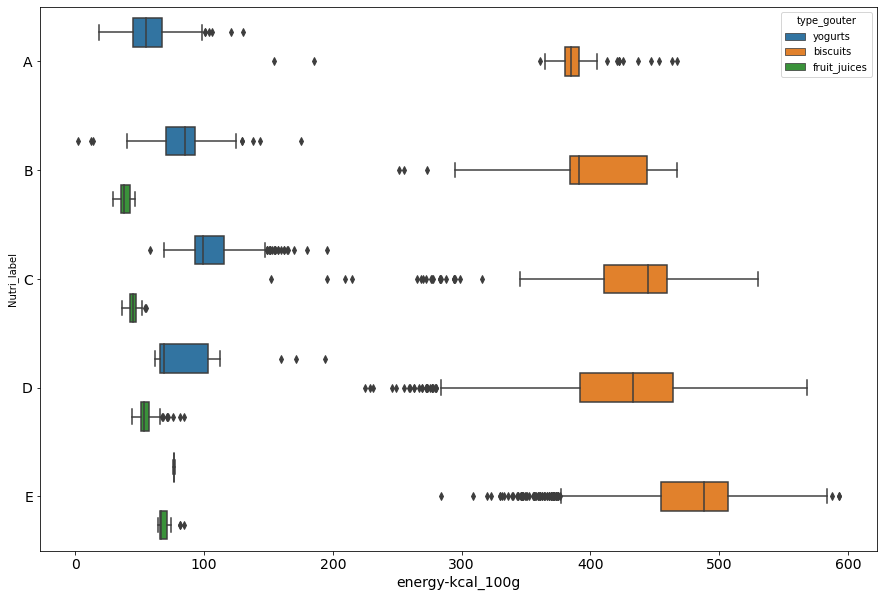

In [93]:
#energy-kcal_100g
f,ax = plt.subplots(figsize = (15,10))
sns.boxplot(x= "energy-kcal_100g", y = "Nutri_label",data = df.sort_values(by="Nutri_label"), 
            hue= "type_gouter", orient = 'h')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("energy-kcal_100g",fontsize=14)
plt.show()

On voit que l'energy-kcal_100g des biscuits est bien distinctes de celles des fruit_juices et yogurts.

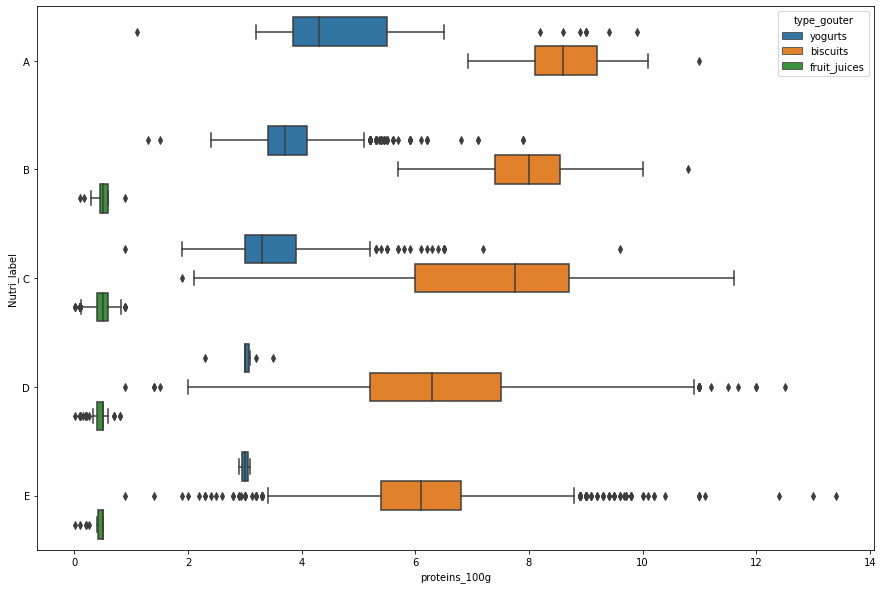

In [51]:
#proteins_100g
f,ax = plt.subplots(figsize = (15,10))
sns.boxplot(x= "proteins_100g", y = "Nutri_label",data = df.sort_values(by="Nutri_label"), 
            hue= "type_gouter", orient = 'h')
plt.show()

Grande étendue pour les biscuits, due à la variété de biscuits

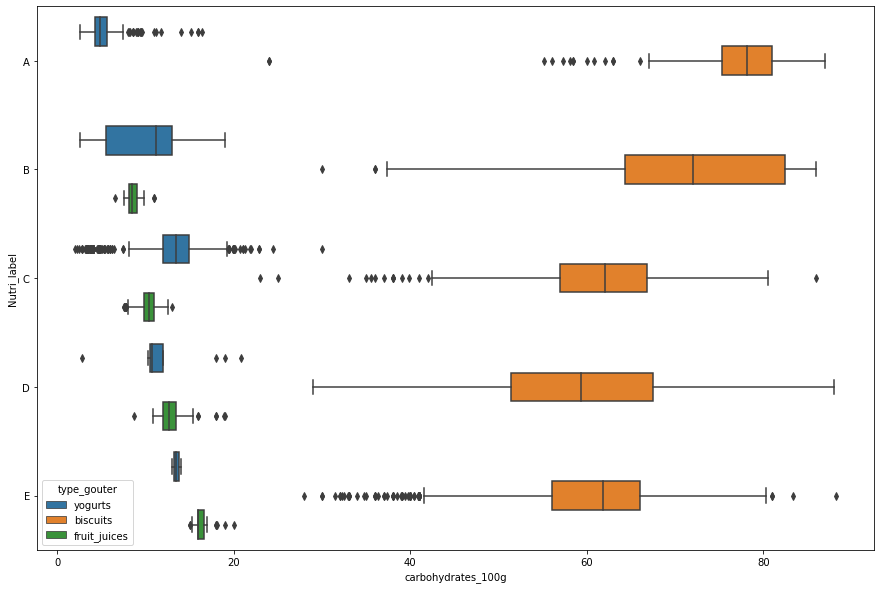

In [52]:
#carbohydrates_100g
f,ax = plt.subplots(figsize = (15,10))
sns.boxplot(x= "carbohydrates_100g", y = "Nutri_label",data = df.sort_values(by="Nutri_label"), 
            hue= "type_gouter", orient = 'h')
plt.show()

D'un côté les biscuits et de l'autre yogurts-fruit_juices.

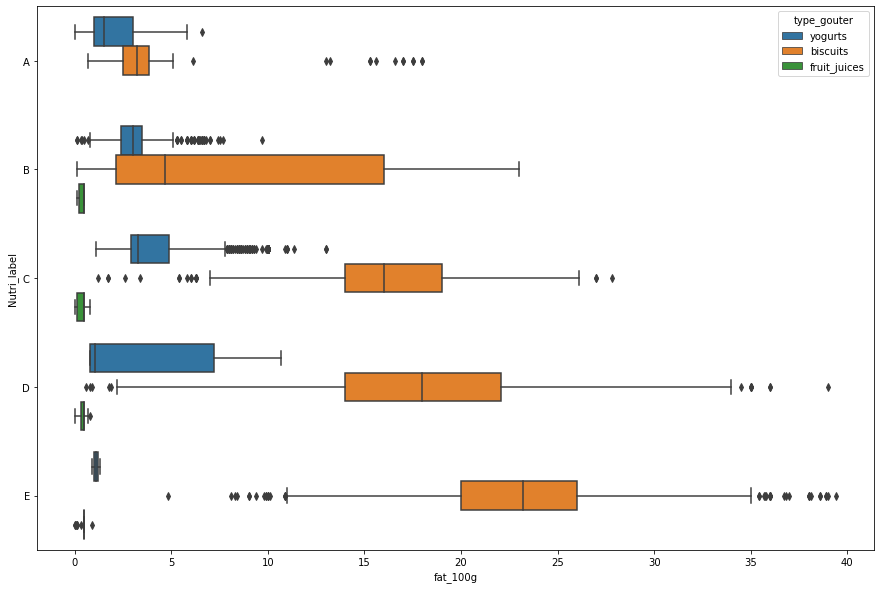

In [53]:
#fat_100g
f,ax = plt.subplots(figsize = (15,10))
sns.boxplot(x= "fat_100g", y = "Nutri_label",data = df.sort_values(by="Nutri_label"), 
            hue= "type_gouter", orient = 'h')
plt.show()

Plus la catégorie est "mauvaise", plus on peut séparer les types de gouter pour fat_100g.

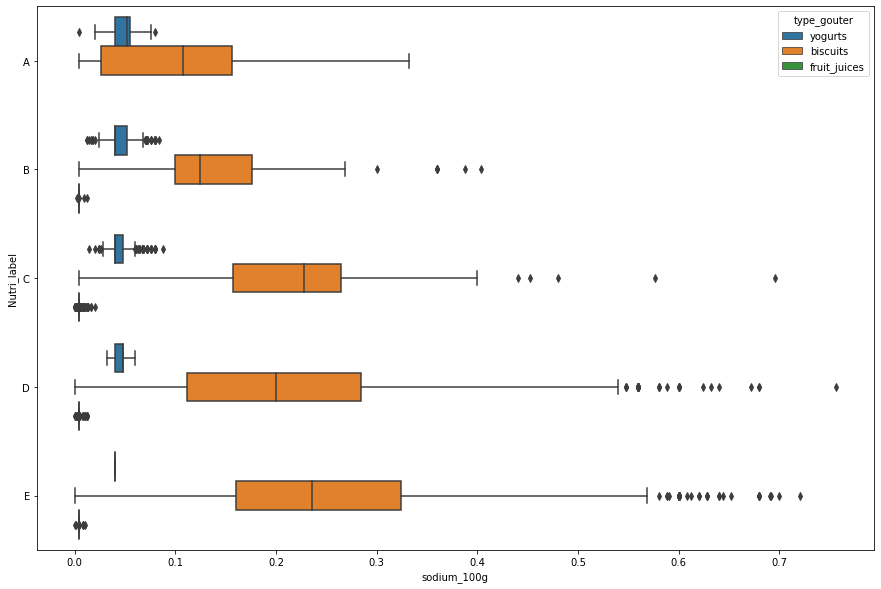

In [54]:
#sodium_100g
f,ax = plt.subplots(figsize = (15,10))
sns.boxplot(x= "sodium_100g", y = "Nutri_label",data = df.sort_values(by="Nutri_label"), 
            hue= "type_gouter", orient = 'h')
plt.show()

La valeur de sodium_100g ne semble pas être vraiment déterminante pour le Nutri_label.

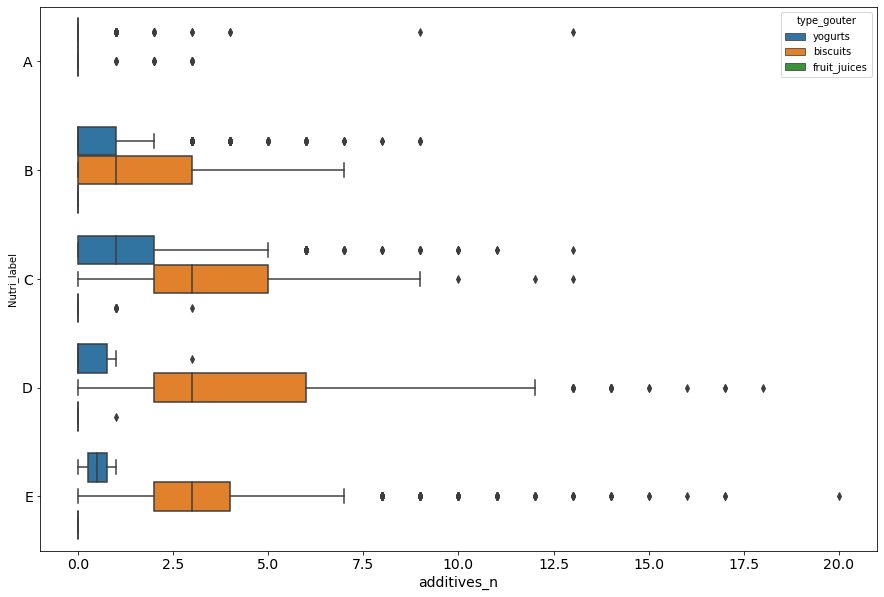

In [94]:
#additives_n
f,ax = plt.subplots(figsize = (15,10))
sns.boxplot(x= "additives_n", y = "Nutri_label",data = df.sort_values(by="Nutri_label"), 
            hue= "type_gouter", orient = 'h')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("additives_n",fontsize=14)
plt.show()

Pour les biscuits entre les catégories C,D,E, le nombre d'additifs ne semble pas lié au Nutri_label.

### 3.2 Box-plot  main_category et additives_n selon Nutri_label

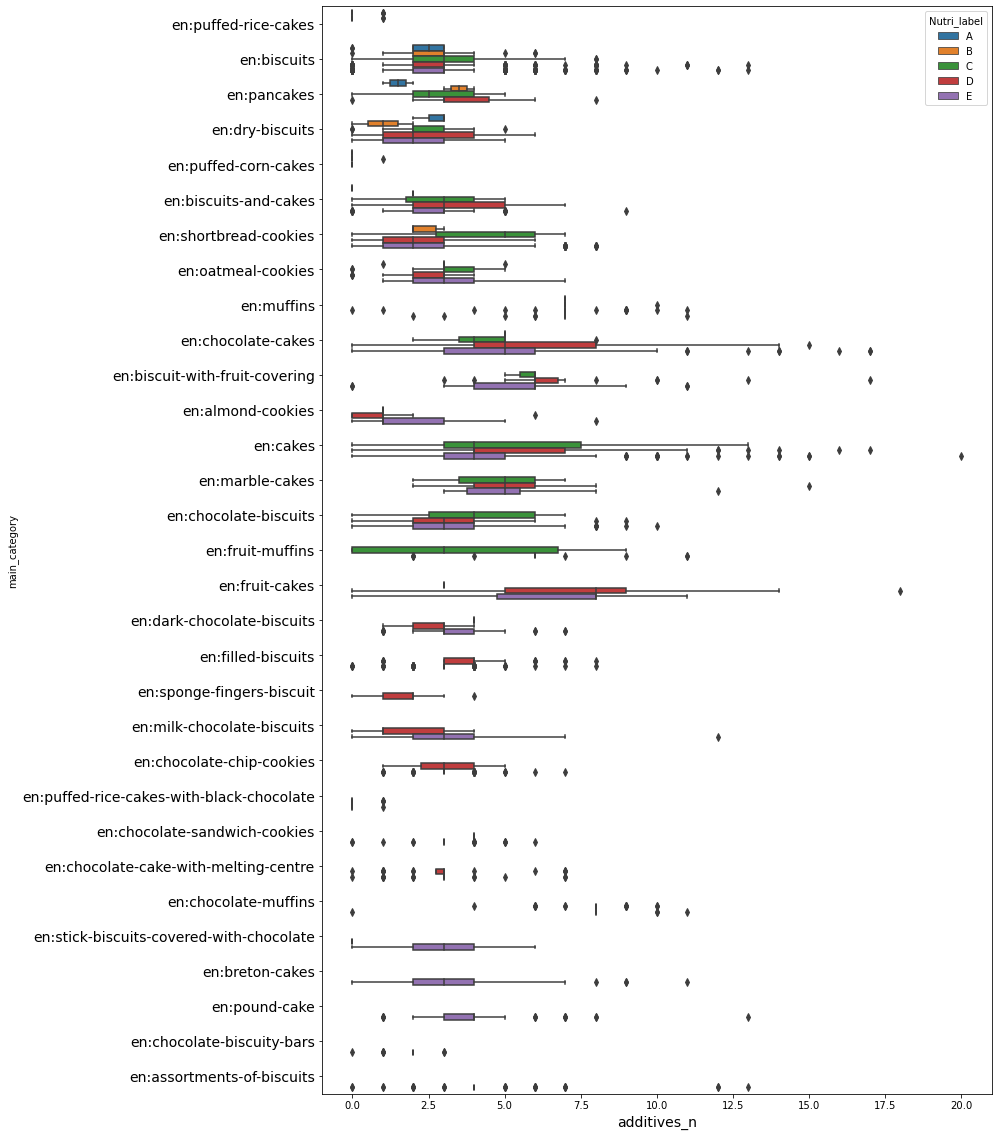

In [116]:
#Biscuits
f,ax = plt.subplots(figsize = (12,20))
sns.boxplot(x= "additives_n", y = "main_category",data = dfB.sort_values(by="Nutri_label"), 
            hue= "Nutri_label", orient = 'h')
plt.yticks(fontsize=14)
plt.xlabel("additives_n",fontsize=14)
plt.show()

Un meilleur Nutri_label n’est pas toujours synonyme de moins d’additifs_n. Donc additifs_n peut être un bon critère pour proposer un meilleur produit en plus du Nutri_label.

Certaines main_catégory avec un seul Nutri_label, là aussi on proposera avec moins d'additifs.

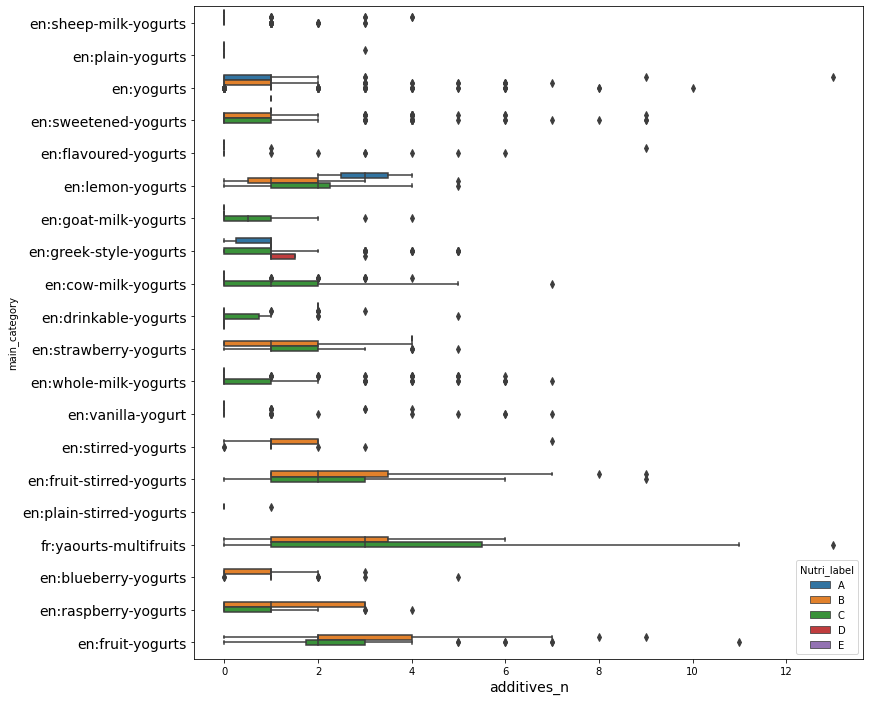

In [117]:
#yogurts
f,ax = plt.subplots(figsize = (12,12))
sns.boxplot(x= "additives_n", y = "main_category",data = dfY.sort_values(by="Nutri_label"), 
            hue= "Nutri_label", orient = 'h')
plt.yticks(fontsize=14)
plt.xlabel("additives_n",fontsize=14)
plt.show()

Même remarque que pour les biscuits

### 3.3 Pairplots selon type_gouter

Ce type de graphe permet de voir les relations entre les variables numériques.

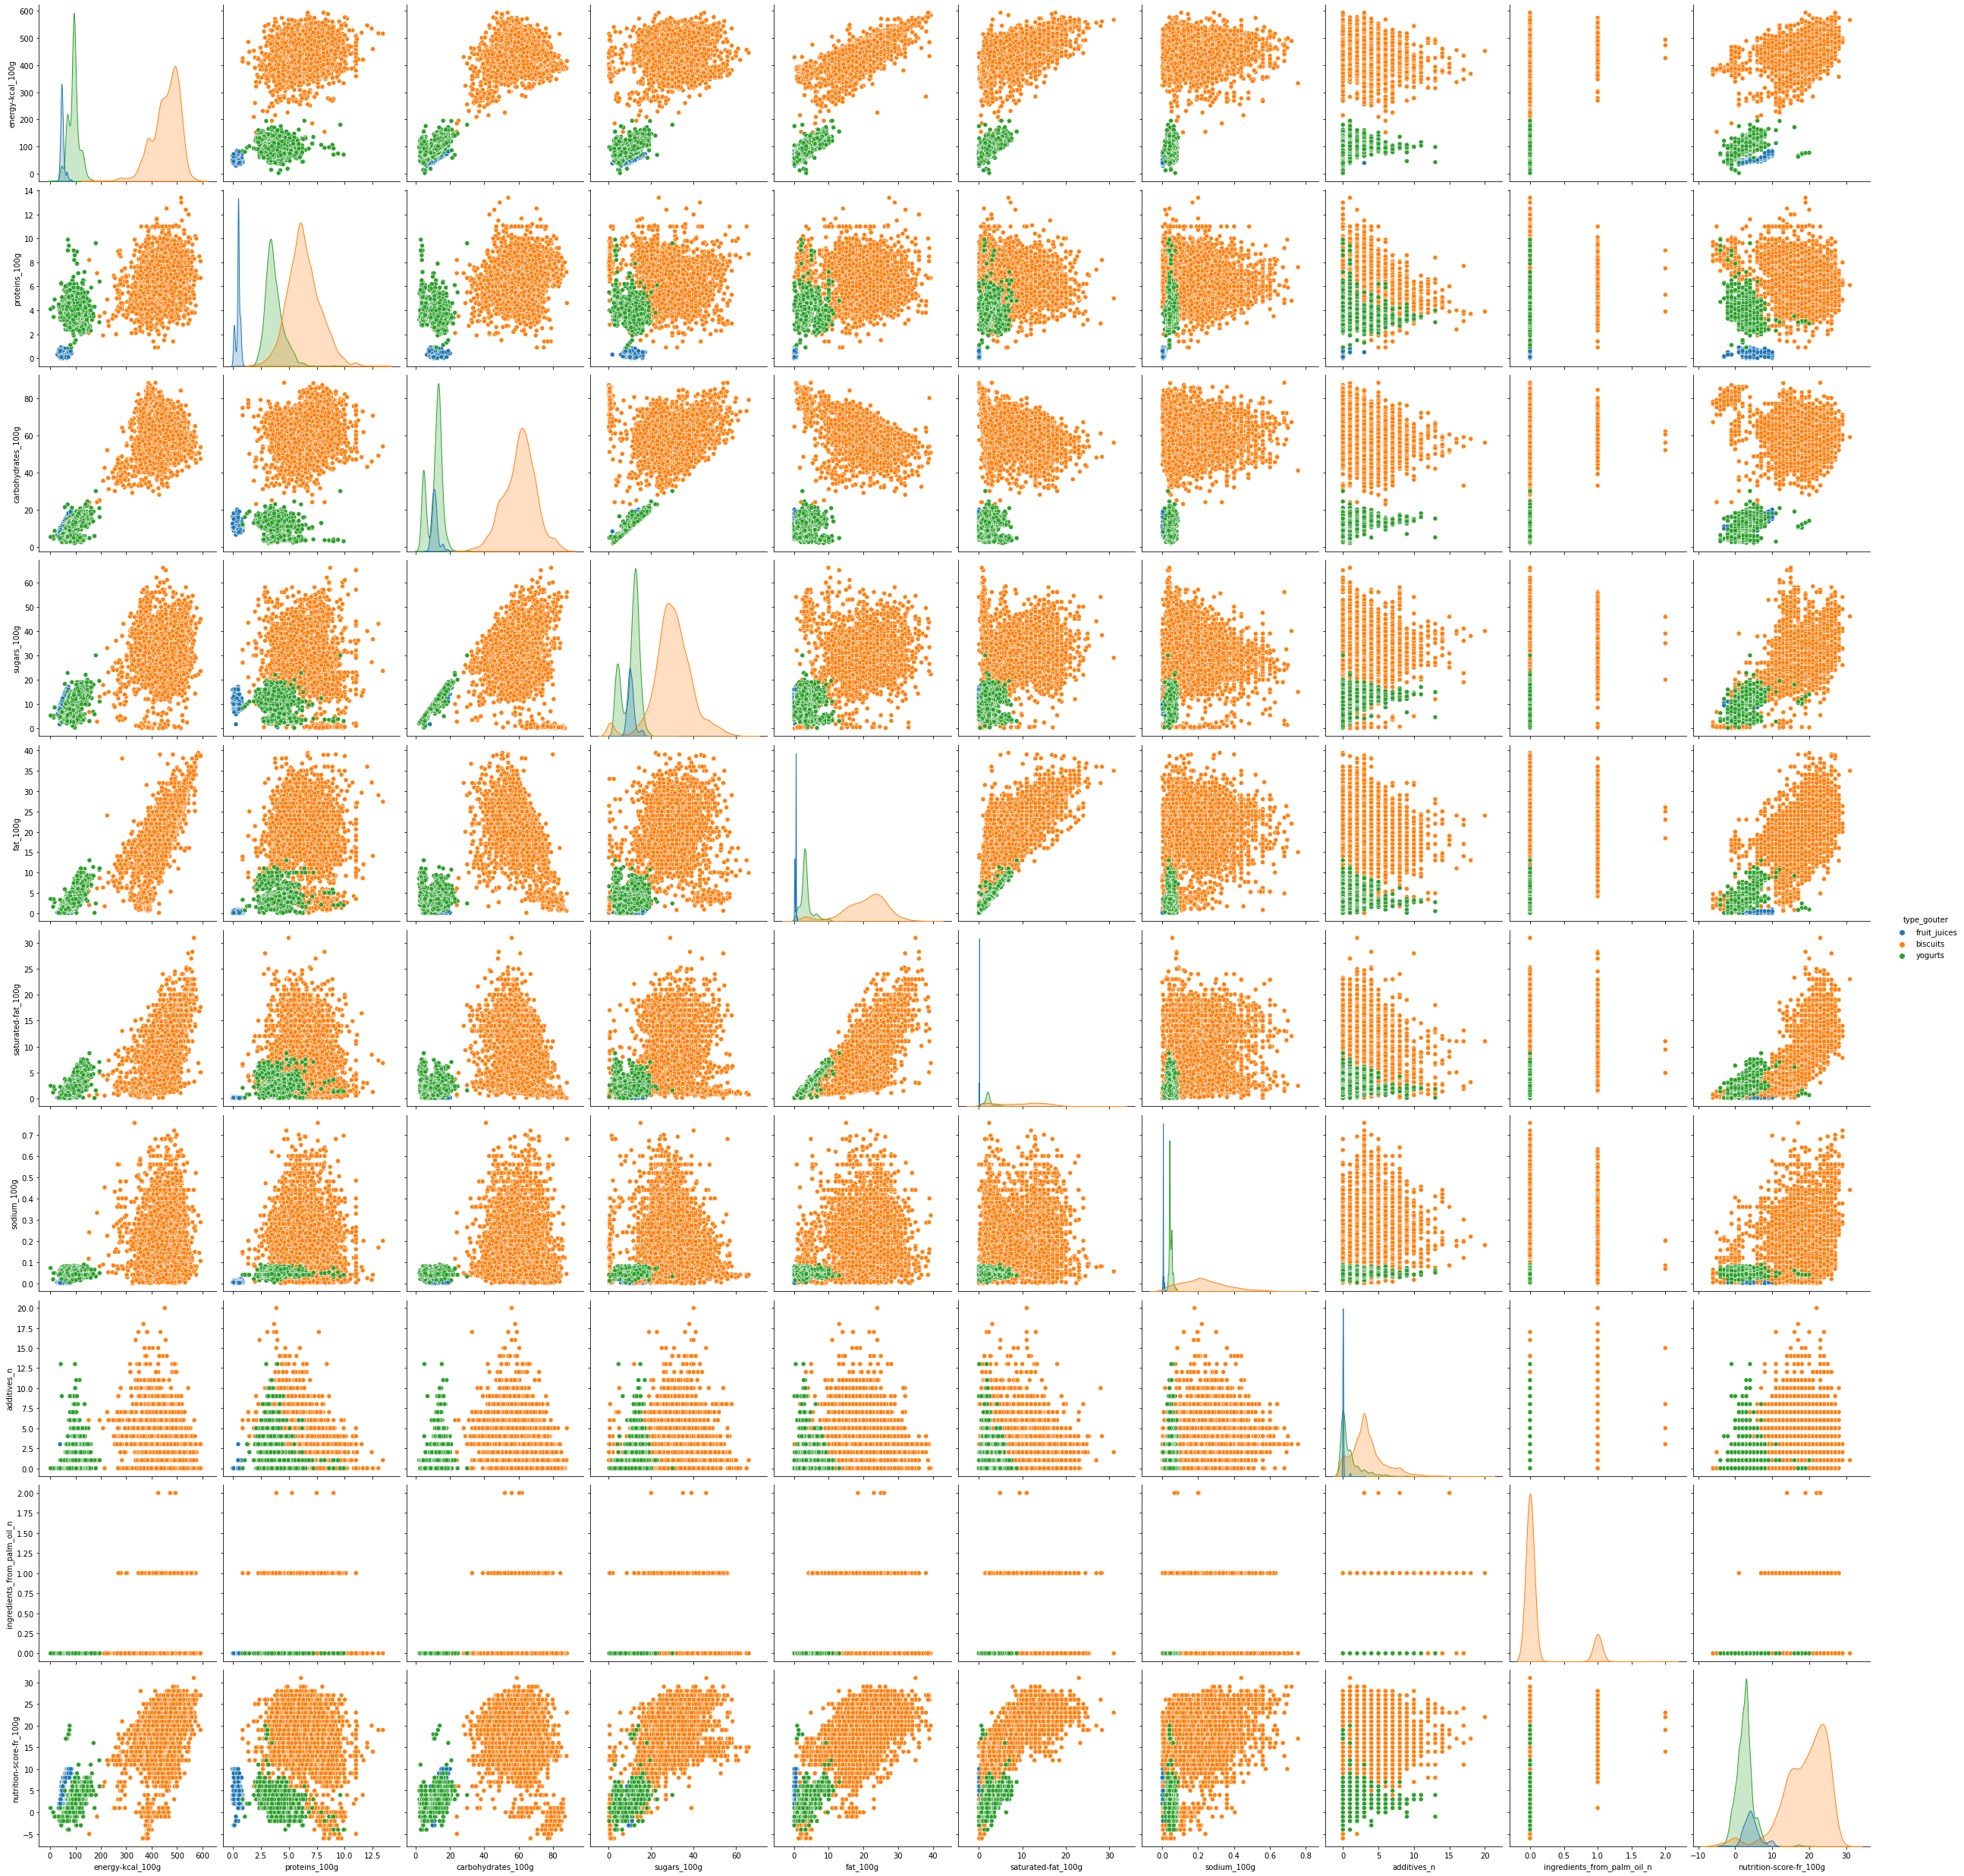

In [62]:
#Affichage des pairplots
sns.pairplot(df, hue='type_gouter', height=3.5)
plt.show()

On voit que energy-kcal et nutriscore permet de séparer les types de gouter.

Tendance linéaire positive entre 
- fat_100g et saturated-fat_100g surtout chez les yogurts
- énergy_kcal_100g et fat_100g chez biscuits et yogurts
- fat_100g et nutrition-score-fr_100g chez biscuits et yogurts

Tendance linéaire négative entre 
- fat_100g et carbohydrate_100g chez les biscuits

### 3.4 Matrice des corrélations selon type_gouter

Ce type de graphe va nous permettre de voir l'intensité des relations entre les variables numériques.

On va regarder pour chaque type_gouter.

In [63]:
#création d'une fonction pour tracer la matrice des corrélations
# prend en paramètre le dataframe
def mat_corr(df) :
    #variables dont on veut étudier les corrélations
    # on exclut ingredients_from_palm_oil_n qui n'est pas très exploitable
    corr = df[['energy-kcal_100g','proteins_100g','carbohydrates_100g','sugars_100g',
                 'fat_100g','saturated-fat_100g','sodium_100g','additives_n',
                 'nutrition-score-fr_100g']].corr()
    
    # Génération d'un masque pour masquer le triangle supérieur et 
    # n'afficher que la partie basse de la matrice
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Initialisation de la figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Générationd d'un mapping pour les couleurs
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Graphe de la matrice des corrélations (= heatmap) avec le masque et correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title("Matrice des corrélations")
    plt.show()

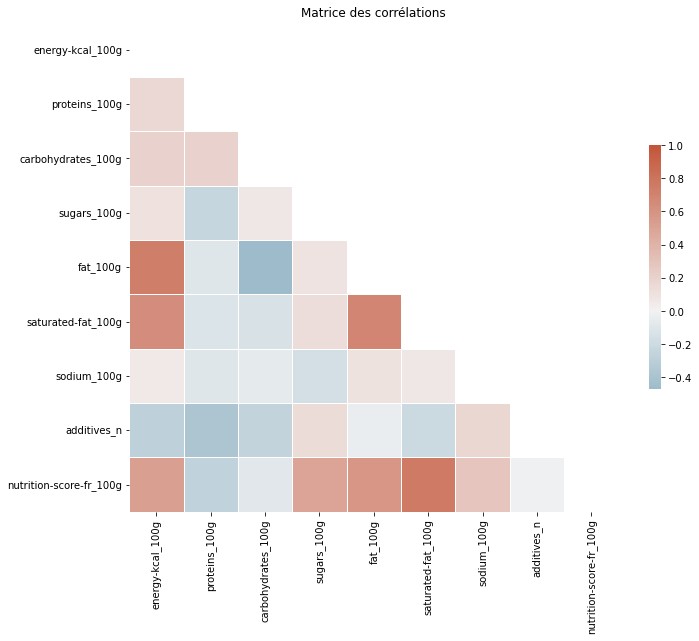

In [64]:
#biscuits
mat_corr(dfB)

On voit que pour les biscuits :
- le nutrition-score-fr_100g est fortement lié au saturated-fat_100g
- l'energy-kcal_100g est très liée au fat_100g et saturated-gat_100g
=> donc les biscuits sont plus gras que sucrés
- corrélation négative moyenne entre fat_100g et carbohydrates_100g
=> les biscuits "ne cumulent pas" gras et sucre, ils sont plutôt soit l'un soit l'autre.
- corrélation quasi nulle entre nutrition-score-fr_100g et additives_n
=> ces deux variables n'ont pas de lien et donc on peut les utiliser pour ensemble pour proposer un meilleur produit.

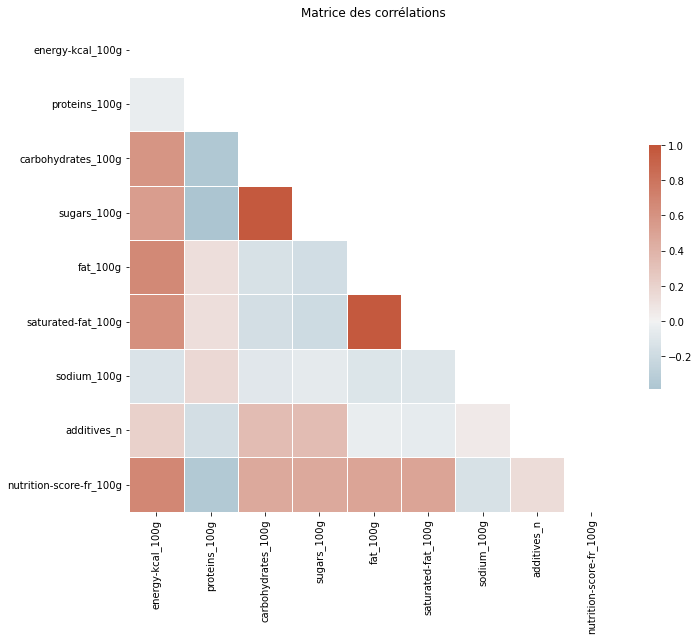

In [65]:
#yogurts
mat_corr(dfY)

On voit que pour les yogurts :
- le nutrition-score-fr_100g est assez lié à energy-kcal_100g
- l'energy-kcal_100g est liée avec des intensités très proches à carbohydrates_100g, sugars_100g, fat_100g et saturated-fat_100g
=> donc les yogurts sont aussi gras que sucrés
- forte corrélation entre fat_100g et saturated-fat_100g
=> "logique" car les saturated-fat_100g sont inclus dans fat_100g
- de même entre carbohydrates_100g et sugars_100g
- corrélation très faible entre nutrition-score-fr_100g et additives_n
=> ces deux variables n'ont pas de lien et donc on peut les utiliser pour ensemble pour proposer un meilleur produit.

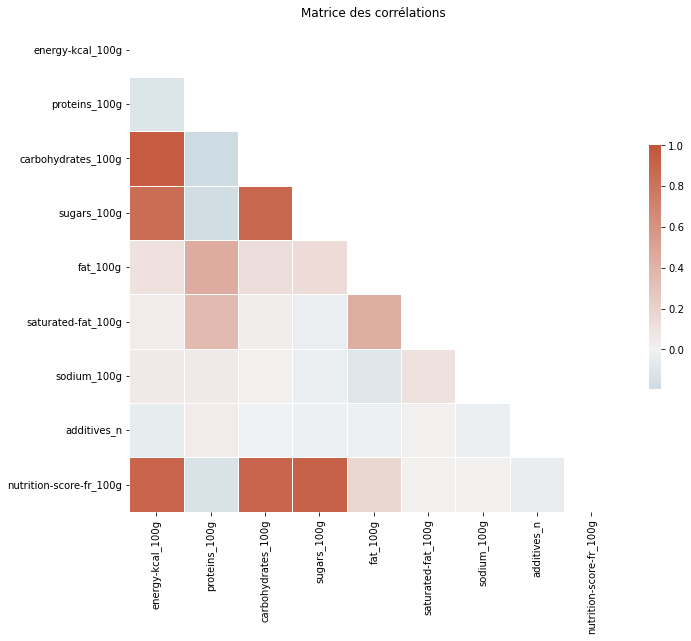

In [66]:
#fruit_juices
mat_corr(dfJ)

On voit que pour les fruit_juices :
- le nutrition-score-fr_100g et energy-kcal_100g sont très liés à carbohydrates_100g et sugars_100g
=> donc les fruit_juices peuvent être associés au sucre
- forte corrélation entre carbohydrates_100g et sugars_100g
=> "logique" car les sugars_100g sont inclus dans carbohydrates_100g
- corrélation très faible entre nutrition-score-fr_100g et additives_n
=> ces deux variables n'ont pas de lien et donc on peut les utiliser pour ensemble pour proposer un meilleur produit.

### 3.5 Calcul du coefficient de corrélation Pearson et p-value pour additives_n et nutrition-score-fr_100g selon le type de gouter

On va calculer la valeur du coefficient de corrélation, ainsi que la p-value pour voir la pertinence de la relation entre additives_n et nutrition-score-fr_100g.

In [67]:
import scipy.stats as st
#Fonction qui retourne le coefficient de corrélation de Pearson entre deux variables (col_X et col_Y), ainsi
# que la p-value associée
#prend en paramètres le dataframe df, les variables col_X et col_YY
def pearson(df,col_X,col_Y) :
    print("Coefficient de Pearson : %.2f " %st.pearsonr(df[col_X],df[col_Y])[0])
    print("P-value : %.2f" %st.pearsonr(df[col_X],df[col_Y])[1])
#st.pearsonr retourne une liste de 2 nombres
#le premier est la valeur du coefficient de corrélation
#le 2ème la p-value

In [68]:
print("biscuits")
pearson(dfB,'additives_n','nutrition-score-fr_100g')

biscuits
Coefficient de Pearson : -0.01 
P-value : 0.51


In [69]:
print("yogurts")
pearson(dfY,'additives_n','nutrition-score-fr_100g')

yogurts
Coefficient de Pearson : 0.14 
P-value : 0.00


In [70]:
print("fruit_juices")
pearson(dfJ,'additives_n','nutrition-score-fr_100g')

fruit_juices
Coefficient de Pearson : -0.04 
P-value : 0.30


Pour les biscuits et les fruit-juices, la p-value est élevée (>5%), donc effectivement il n'y a pas de lien entre additives_n et nutrition-score-fr_100g pour ces 2 catégories.

Donc la proposition d'un produit de meilleur nutriscore n'entrainera pas forcément une diminution du nombre d'additifs => intérêt d'en tenir compte.

### 3.6 Lien linéaire entre variables quantitatives

On va regarder graphiquement plus en détail si il y a un lien linéaire entre certaines variables quantitatives.

In [71]:
#Fonction pour tracer la variable col_Y en fonction de la variable col_X pour un dataframe df
#prend en paramètres le dataframe df, la variable col_X et la variable col_Y
def plot(df,col_X, col_Y) :
    plt.plot(df[col_X], df[col_Y], 'bo', markersize = 4)
    plt.xlabel(col_X)
    plt.ylabel(col_Y)
    plt.title("{} en fonction de {}".format(col_Y, col_X))
    plt.show()

biscuits


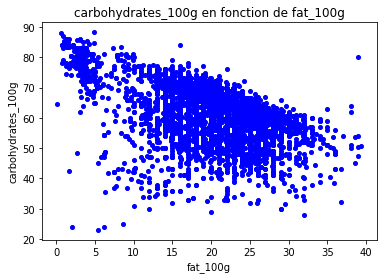

In [74]:
print("biscuits")
plot(dfB,"fat_100g","carbohydrates_100g")

On devine effectivement une tendance linéaire négative. Mais le nuage s'écarte en pointe et pas mal d'outliers. On devine également 2 sous-groupes dans ce nuage. 

Il faudrait traiter par type de main_category.

biscuits


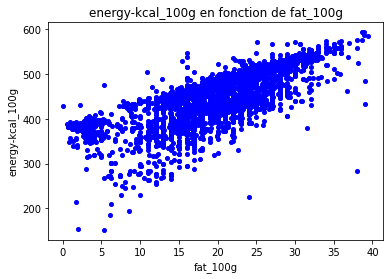

In [75]:
print("biscuits")
plot(dfB,"fat_100g","energy-kcal_100g")

Ici, tendance linéaire positive mais nuage en pointe et qui laisse apparaitre trois groupes assez proches.
Il y a moins de variation pour les hautes valeurs de fat_100g.

yogurts


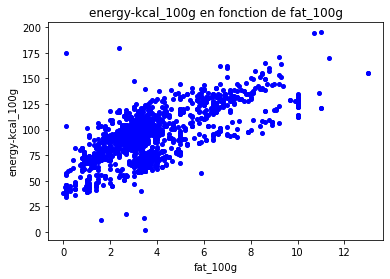

In [77]:
print("yogurts")
plot(dfY,"fat_100g","energy-kcal_100g")

Tendance linéaire positive mais nuage avec deux groupes.

yogurts


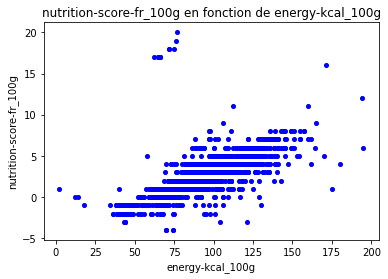

In [78]:
print("yogurts")
plot(dfY,"energy-kcal_100g","nutrition-score-fr_100g")

Ici on voit que nutrition-score-fr_100g est un integer, on devine une tendance linéaire positive.

fruit_juices


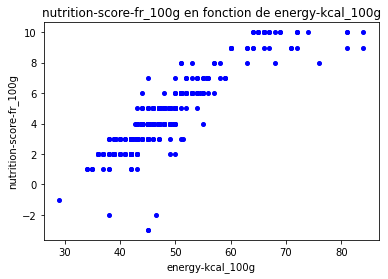

In [81]:
print("fruit_juices")
plot(dfJ,"energy-kcal_100g","nutrition-score-fr_100g")

On devine une tendance linéaire positive, avec une pente plus forte que dans le cas des yogurts.

#### Tentative de regression

Par curiosité, on va regarder ce que donne une tentative de regression linéaire sur carbohydrates_100g et fat_100g chez les biscuits.

In [82]:
# importation des libraires
from sklearn.model_selection import train_test_split # pour splitter les données en train et tes
from sklearn import linear_model # modèle linéaire
from sklearn.metrics import r2_score # calcul du R2_score pour évaluer la pertinence du modèle de régression

In [83]:
# fonction qui permet d'effectuer la régression en splittant les données 
# retourne 2 graphes : nuage de points des données d'entrainement avec droite de régression et 
# nuage de points des données de test avec droite de régression
# retourne également le r2-score
# prend en paramètres le dateframe df, variable col_X, variable col_Y

def regr(df, col_X, col_Y) :
    # split des données en 80% données entrainement et 20% données de test
    xtrain, xtest, ytrain, ytest = train_test_split(df[[col_X]], df[[col_Y]], train_size=0.8)
    lr = linear_model.LinearRegression() #choix du modèle de type régression
    lr.fit(xtrain[[col_X]], ytrain) # on entraine le modèle
    prediction_train = lr.predict(xtrain[[col_X]]) #valeurs de prédiction chez les données d'entrainement
    prediction_test = lr.predict(xtest[[col_X]]) # valeurs de prédiction chez les données de test
    
    #génération de la figure
    f, ax = plt.subplots(figsize=(15, 7))
    plt.subplot(121) # graphe 1
    #nuage de points des données d'entrainement
    plt.plot(xtrain[[col_X]], ytrain,'bo', markersize = 5) 
    # superposition de la droite de régression sur données entrainement
    plt.plot(xtrain[[col_X]], prediction_train, '-r')
    plt.xlabel(col_X)
    plt.ylabel(col_Y)
    plt.title("Droite de régression superposée aux données d'entrainement")
    
    plt.subplot(122) # graphe 2
    #nuage de points des données de test
    plt.plot(xtest[[col_X]], ytest,'bo', markersize = 5)
    # superposition de la droite de régression sur données test
    plt.plot(xtest[[col_X]], prediction_test, '-r')
    plt.xlabel(col_X)
    plt.ylabel(col_Y)
    plt.title("Droite de régression superposée aux données de test")
    print("R2-score : %.2f" %r2_score(ytest, prediction_test)) #Calcul du R2 score

R2-score : 0.23


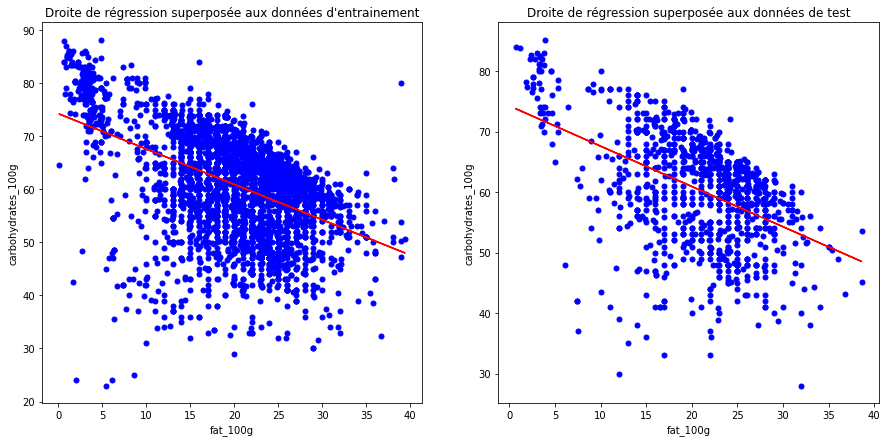

In [85]:
regr(dfB,'fat_100g',"carbohydrates_100g" )

Comme prévu, le modèle n'est pas concluant. Il y a en effet pas mal d'outliers et le nuage de points est assez étalé.

On va regarder chez les fruit_juices entre carbohydrates_100g et energy-kcal_100g.

R2-score : 0.91


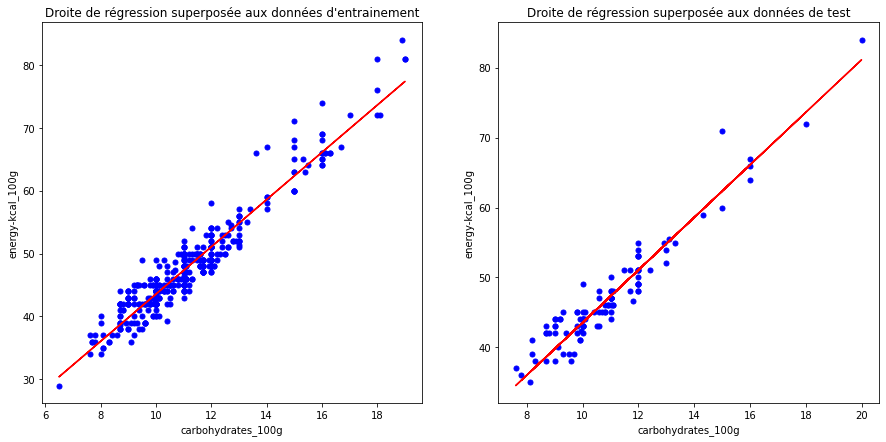

In [86]:
regr(dfJ,"carbohydrates_100g","energy-kcal_100g" )

Ici, on a bien une relation linéaire positive entre la quantité de carbohydrates_100g et energy-kcal_100g chez les fruit_juices. On peut donc prédire energy-kcal_100g en fonction de carbohydrates_100g.

Regardons entre fat_100g et energy-kcal_100g pour les biscuits

R2-score : 0.57


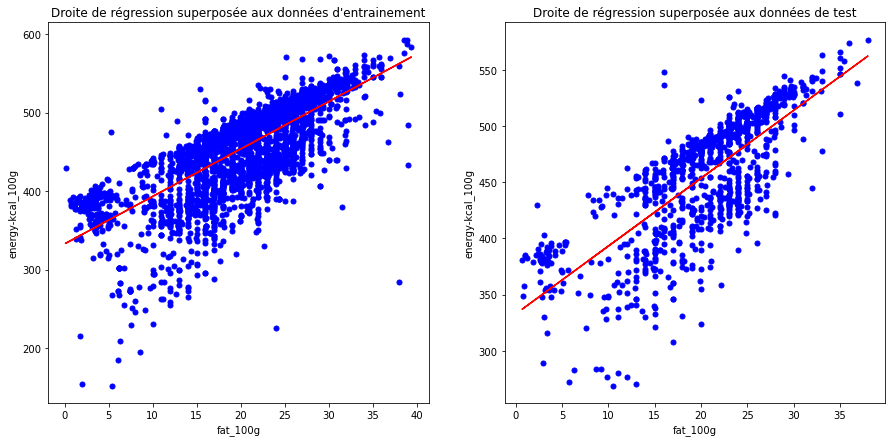

In [89]:
regr(dfB,"fat_100g","energy-kcal_100g")

Là encore pas mal d'outliers. On voit que les données comportent 2 grands sous groupes. Au final, la fat_100g n'explique que 57% de la variabilité d'energy-kcal_100g. Donc les autres variables sont à prendre en compte pour energy-kcal_100g.

### 3.7 Analyse en composantes principales (ACP)

On va effectuer une analyse en composantes principales pour voir si additives_n se distingue bien des autres variables numériques.

In [95]:
# import des ibrairies
from sklearn import decomposition, preprocessing
# import des fonctions pour représentation dans le cadre de l'ACP
from functions import *

n_comp = 6 #On prend 6 car on va prendre 6 variables

# Choix des colonnes pour faire l'ACP
data_pca = df[["energy-kcal_100g","proteins_100g","sugars_100g",
                  "saturated-fat_100g","sodium_100g","additives_n"]]
X = data_pca.values #array pour stocker les valeurs
names = df["code"]
features = data_pca.columns # noms des variables

X_scaled = preprocessing.StandardScaler().fit_transform(X) #Centrage réduction des données
pca = decomposition.PCA(n_components = n_comp) #définition de l'instance de pca
pca.fit(X_scaled) # application de la pca

PCA(n_components=6)

In [96]:
# Fonction pour dessiner l'éboulis des valeurs propres de la pca
# prend en argument la pca
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

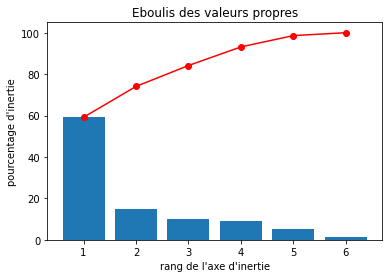

In [97]:
display_scree_plot(pca) # ébouli des valeurs propres

Les 2 premiers axes d'inertie contiennent plus de 70% de l'inertie, on va donc ne garder que ces axes.

In [98]:
pcs = pca.components_ # récupération du calcul des différents composants 

In [99]:
#Fonction pour afficher les cercles de corrélations selon les axes d'inertie 
# prend en paramètres : pcs, le nb de composants n_comp, le rang des axes axis_ranks, 
#nom des variables à prendre dans labels
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        

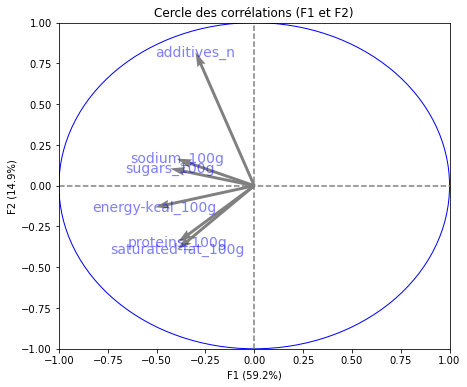

In [100]:
# On va afficher que sur F1 et F2, donc sur axis_ranks = [(0,1)]
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

On voit que additives_n est majoritairement sur F2.
Les autres variables sont regroupées sur F1 et un peu F2.

On peut en conclure que additives_n est indépendante des autres variables.

### 3.8 Test du CHI2 d'indépendance

#### Entre Nutri_label et type_gouter

On va regarder s'il y a indépendance entre le Nutri_label et type_gouter.

On construit le tableau de contingence entre les variables qualitatives type_gouter et Nutri_label.

In [102]:
X = "type_gouter" 
Y = "Nutri_label"
cont = df[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)
#remplir les NaN en 0, copie du dataframe original et tout convertir en int
cont

Nutri_label     A    B     C     D     E
type_gouter                             
biscuits       79   79   230  1787  3222
fruit_juices    0   16   404    96    26
yogurts       187  999  1203    14     2

On effectue le test statistique.

In [104]:
import scipy.stats as st # importation de la librairie
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)
#st_chi2 = valeur du chi2
#st_p = valeur de la p-value
#st_dof = nombre de degrés de libertés ((len(X)-1)*(len(Y)-1)
#st_exp = array des valeurs attendues calculées selon les marges du tableau

In [108]:
print("valeur du Chi2 : %.2f" %st_chi2)
print("valeur de la p-value : %.2f" %st_p)
print("nombre de degrés de liberté : %d" %st_dof)

valeur du Chi2 : 7090.76
valeur de la p-value : 0.00
nombre de degrés de liberté : 8


Comme p-value <5%, on rejette l'hypothèse d'indépendance entre le type de gouter et le nutri_label au risque de 1%.

#### Entre Nutri_label et main_category 

On va regarder s'il y a indépendance entre le Nutri_label et main_category chez les biscuits.

In [110]:
#tableau de contingence 
X = "main_category"
Y = "Nutri_label"
contB = dfB[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)
#remplir les NaN en 0, copie du dataframe original et tout convertir en int
contB

Nutri_label                                 A   B   C    D    E
main_category                                                  
en:almond-cookies                           0   0   2   33   22
en:assortments-of-biscuits                  0   0   0    0   70
en:biscuit-with-fruit-covering              0   0   3   26   32
en:biscuits                                10  22  95  353  697
en:biscuits-and-cakes                       1   1   8   33   70
en:breton-cakes                             0   0   0    0   72
en:cakes                                    0   0  19  230  250
en:chocolate-biscuits                       0   0  23  117  426
en:chocolate-biscuity-bars                  0   0   0    0   40
en:chocolate-cake-with-melting-centre       0   0   0   32   41
en:chocolate-cakes                          0   1   4  165  118
en:chocolate-chip-cookies                   0   0   0   10   93
en:chocolate-muffins                        0   0   0   39   14
en:chocolate-sandwich-cookies               0   0   0    1   43
en:dark-chocolate-biscuits                  0   0   1   24   48
en:dry-biscuits                             3   2  17   66   82
en:filled-biscuits                          0   0   0   98  148
en:fruit-cakes                              0   0   1  135   80
en:fruit-muffins                            0   0   4   37    0
en:marble-cakes                             0   0   3   73   16
en:milk-chocolate-biscuits                  0   0   0    9  170
en:muffins                                  0   2   6   44   28
en:oatmeal-cookies                          0   5  19   23   36
en:pancakes                                 2   2  12   35    0
en:pound-cake                               0   0   0    0  110
en:puffed-corn-cakes                       20  23   1    0    0
en:puffed-rice-cakes                       43  15   0    0    0
en:puffed-rice-cakes-with-black-chocolate   0   0   0   33    8
en:shortbread-cookies                       0   6  12   76  456
en:sponge-fingers-biscuit                   0   0   0   94    0
en:stick-biscuits-covered-with-chocolate    0   0   0    1   52

In [111]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(contB)

In [112]:
print("valeur du Chi2 : %.2f" %st_chi2)
print("valeur de la p-value : %.2f" %st_p)
print("nombre de degrés de liberté : %d" %st_dof)

valeur du Chi2 : 5342.61
valeur de la p-value : 0.00
nombre de degrés de liberté : 120


On rejette l'hypothèse d'indépendance entre main_category (donc entre le type de biscuits) et le nutri_label au risque de 5%.

On va regarder cette indépendance sur l'ensemble des main_category.

In [113]:
#tableau de contingence 
X = "main_category"
Y = "Nutri_label"
contT = df[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)
#remplir les NaN en 0, copie du dataframe original et tout convertir en int
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(contT)

In [114]:
print("valeur du Chi2 : %.2f" %st_chi2)
print("valeur de la p-value : %.2f" %st_p)
print("nombre de degrés de liberté : %d" %st_dof)

valeur du Chi2 : 12913.44
valeur de la p-value : 0.00
nombre de degrés de liberté : 272


On rejette l'hypothèse d'indépendance entre main_category  et le nutri_label au risque de 5%.